In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, confusion_matrix, \
    precision_recall_fscore_support
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, \
    precision_recall_fscore_support,precision_score,recall_score,classification_report
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Data Exploration

In [2]:
df=pd.read_csv(r"E:\Machine Project\weather.csv")

In [3]:
df.head(20)

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
5,5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,...,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0,No
6,6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,...,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0.0,No
7,7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,...,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0,No
8,8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,...,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1.4,Yes
9,9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,...,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0.0,No


In [4]:
df.columns

Index(['Unnamed: 0', 'Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall',
       'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am',
       'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [5]:
df.drop('Unnamed: 0',inplace=True,axis=1)

In [6]:
pd.set_option('display.max_columns',None)

df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,2013-03-09,Penrith,16.5,30.0,0.0,NaN,NaN,NE,26.0,SSE,NE,2.0,7.0,87.0,41.0,NaN,NaN,NaN,NaN,21.6,29.4,No,0.0,No
24996,2013-03-10,Penrith,16.7,30.5,0.0,NaN,NaN,NE,24.0,ESE,N,4.0,6.0,84.0,44.0,NaN,NaN,NaN,NaN,21.3,29.0,No,0.0,No
24997,2013-03-11,Penrith,18.3,29.8,0.0,NaN,NaN,ENE,26.0,NaN,ESE,0.0,6.0,98.0,49.0,NaN,NaN,NaN,NaN,20.6,28.2,No,0.0,No
24998,2013-03-12,Penrith,17.5,28.1,0.0,NaN,NaN,NNE,22.0,S,NE,4.0,7.0,90.0,54.0,NaN,NaN,NaN,NaN,21.2,26.8,No,0.0,No


In [7]:
df.columns=[col.lower() for col in df]
df.columns

Index(['date', 'location', 'mintemp', 'maxtemp', 'rainfall', 'evaporation',
       'sunshine', 'windgustdir', 'windgustspeed', 'winddir9am', 'winddir3pm',
       'windspeed9am', 'windspeed3pm', 'humidity9am', 'humidity3pm',
       'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am',
       'temp3pm', 'raintoday', 'risk_mm', 'raintomorrow'],
      dtype='object')

# Data Pre-Processing

### Rename The Columns

In [8]:
#Rename The columns
df.rename(columns={
    'mintemp': 'minimum_temp',
    'maxtemp':'maximum_temp',
    'rainfall':'rain_fall',
    'windgustdir':'Wind_gustdir',
    'winddir9am':'Winddir_9am',
    'winddir3pm':'Winddir_3pm',
    'windgustspeed':'Wind_gustspeed',
    'windspeed9am':'Wind_speed9am',
    'windspeed3pm':'Wind_speed3pm',
    'humidity9am':'Humidity_9am',
    'humidity3pm':'Humidity_3pm',
    'pressure9am':'Pressure_9am',
    'pressure3pm':'Pressure_3pm',
    'cloud9am':'Cloud_9am',
    'cloud9am':'Cloud_9am',
    'temp9am':'Temp_9am',
    'temp3pm':'Temp_3pm',
    'raintoday':'Rain_today',
    'raintomorrow':'Rain_tomorrow'
    }, inplace=True)

In [9]:
df.columns

Index(['date', 'location', 'minimum_temp', 'maximum_temp', 'rain_fall',
       'evaporation', 'sunshine', 'Wind_gustdir', 'Wind_gustspeed',
       'Winddir_9am', 'Winddir_3pm', 'Wind_speed9am', 'Wind_speed3pm',
       'Humidity_9am', 'Humidity_3pm', 'Pressure_9am', 'Pressure_3pm',
       'Cloud_9am', 'cloud3pm', 'Temp_9am', 'Temp_3pm', 'Rain_today',
       'risk_mm', 'Rain_tomorrow'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            25000 non-null  object 
 1   location        25000 non-null  object 
 2   minimum_temp    24669 non-null  float64
 3   maximum_temp    24824 non-null  float64
 4   rain_fall       24721 non-null  float64
 5   evaporation     9432 non-null   float64
 6   sunshine        6664 non-null   float64
 7   Wind_gustdir    21543 non-null  object 
 8   Wind_gustspeed  21545 non-null  float64
 9   Winddir_9am     21928 non-null  object 
 10  Winddir_3pm     23267 non-null  object 
 11  Wind_speed9am   24428 non-null  float64
 12  Wind_speed3pm   23770 non-null  float64
 13  Humidity_9am    24609 non-null  float64
 14  Humidity_3pm    23936 non-null  float64
 15  Pressure_9am    20172 non-null  float64
 16  Pressure_3pm    20173 non-null  float64
 17  Cloud_9am       14136 non-null 

In [11]:
print(df.isnull().sum().to_string())

date                  0
location              0
minimum_temp        331
maximum_temp        176
rain_fall           279
evaporation       15568
sunshine          18336
Wind_gustdir       3457
Wind_gustspeed     3455
Winddir_9am        3072
Winddir_3pm        1733
Wind_speed9am       572
Wind_speed3pm      1230
Humidity_9am        391
Humidity_3pm       1064
Pressure_9am       4828
Pressure_3pm       4827
Cloud_9am         10864
cloud3pm          11185
Temp_9am            245
Temp_3pm            918
Rain_today          279
risk_mm               0
Rain_tomorrow         0


### Replace Values

In [12]:
df['Rain_today'].unique()


array(['No', 'Yes', nan], dtype=object)

In [13]:
df['Rain_today'].mode()

0    No
Name: Rain_today, dtype: object

In [14]:
# Replace No->0 , Yes->1 nan->2

df['Rain_today'] = df['Rain_today'].replace('No', 0)
df['Rain_today'] = df['Rain_today'].replace('Yes', 1)
df['Rain_today'] = df['Rain_today'].replace(np.nan, 0)

In [15]:
df.isnull().sum()

date                  0
location              0
minimum_temp        331
maximum_temp        176
rain_fall           279
evaporation       15568
sunshine          18336
Wind_gustdir       3457
Wind_gustspeed     3455
Winddir_9am        3072
Winddir_3pm        1733
Wind_speed9am       572
Wind_speed3pm      1230
Humidity_9am        391
Humidity_3pm       1064
Pressure_9am       4828
Pressure_3pm       4827
Cloud_9am         10864
cloud3pm          11185
Temp_9am            245
Temp_3pm            918
Rain_today            0
risk_mm               0
Rain_tomorrow         0
dtype: int64

In [16]:
df['Rain_today'].unique()

array([0., 1.])

In [17]:
df['Rain_tomorrow'].unique()


array(['No', 'Yes'], dtype=object)

In [18]:
# Replace No->0 , Yes->1 
df['Rain_tomorrow'] = df['Rain_tomorrow'].replace('No', 0)
df['Rain_tomorrow'] = df['Rain_tomorrow'].replace('Yes', 1)

### Fill Null Value


In [19]:
df['Winddir_9am'].mode()


0    SW
Name: Winddir_9am, dtype: object

In [20]:
df['Winddir_3pm'].mode()


0    SE
Name: Winddir_3pm, dtype: object

In [21]:
df['Wind_speed3pm'].mode()


0    9.0
Name: Wind_speed3pm, dtype: float64

In [22]:
#import statistics
#df['Wind_speed9am'] = df['Wind_speed9am'].fillna (df['Wind_speed9am'].mode())
#df['Wind_speed3pm'] = df['Wind_speed3pm'].fillna (df['Wind_speed3pm'].mode())
#df['Wind_speed3pm'].fillna(df['Wind_speed3pm'].mean(), inplace=True)
#df['Wind_speed9am'].fillna(df['Wind_speed9am'].mean(), inplace=True)
#mode_value = statistics.mode(df['Wind_speed3pm'])
#print("Mode value:", mode_value)
mode=df['minimum_temp'].mode()
df['minimum_temp'] =  df['minimum_temp'].fillna(mode[0])

In [23]:
mode=df['maximum_temp'].mode()
df['maximum_temp'] =  df['maximum_temp'].fillna(mode[0])

In [24]:
mode=df['Humidity_3pm'].mode()
df['Humidity_3pm'] =  df['Humidity_3pm'].fillna(mode[0])

In [25]:
mode=df['Humidity_9am'].mode()
df['Humidity_9am'] =  df['Humidity_9am'].fillna(mode[0])

In [26]:
mode=df['Wind_speed3pm'].mode()
df['Wind_speed3pm'] =  df['Wind_speed3pm'].fillna(mode[0])

In [27]:
mode=df['Wind_speed9am'].mode()
df['Wind_speed9am'] =  df['Wind_speed9am'].fillna(mode[0])

In [28]:
mode=df['cloud3pm'].mode()
df['cloud3pm'] =  df['cloud3pm'].fillna(mode[0])

In [29]:
mode=df['Cloud_9am'].mode()
df['Cloud_9am'] =  df['Cloud_9am'].fillna(mode[0])

In [30]:
mode=df['Temp_9am'].mode()
df['Temp_9am'] =  df['Temp_9am'].fillna(mode[0])

In [31]:
mode=df['Temp_3pm'].mode()
df['Temp_3pm'] =  df['Temp_3pm'].fillna(mode[0])

In [32]:
df.drop(['Wind_gustdir'],axis=1,inplace=True)

In [33]:
mode=df['Pressure_9am'].mode()
df['Pressure_9am'] =  df['Pressure_9am'].fillna(mode[0])

In [34]:
mode=df['Pressure_3pm'].mode()
df['Pressure_3pm'] =  df['Pressure_3pm'].fillna(mode[0])

In [35]:
mode=df['Winddir_3pm'].mode()
df['Winddir_3pm'] =  df['Winddir_3pm'].fillna(mode[0])

In [36]:
mode=df['Winddir_9am'].mode()
df['Winddir_9am'] =  df['Winddir_9am'].fillna(mode[0])

In [37]:
mode=df['rain_fall'].mode()
df['rain_fall'] =  df['rain_fall'].fillna(mode[0])

In [38]:
mode=df['Wind_gustspeed'].mode()
df['Wind_gustspeed'] =  df['Wind_gustspeed'].fillna(mode[0])

In [39]:
df.drop('evaporation',inplace=True,axis=1)

In [40]:
df.drop('sunshine',inplace=True,axis=1)

In [41]:
df.isnull().sum()

date              0
location          0
minimum_temp      0
maximum_temp      0
rain_fall         0
Wind_gustspeed    0
Winddir_9am       0
Winddir_3pm       0
Wind_speed9am     0
Wind_speed3pm     0
Humidity_9am      0
Humidity_3pm      0
Pressure_9am      0
Pressure_3pm      0
Cloud_9am         0
cloud3pm          0
Temp_9am          0
Temp_3pm          0
Rain_today        0
risk_mm           0
Rain_tomorrow     0
dtype: int64

In [42]:
df.shape

(25000, 21)

In [43]:
df.describe()

,minimum_temp,maximum_temp,rain_fall,Wind_gustspeed,Wind_speed9am,Wind_speed3pm,Humidity_9am,Humidity_3pm,Pressure_9am,Pressure_3pm,Cloud_9am,cloud3pm,Temp_9am,Temp_3pm,Rain_today,risk_mm,Rain_tomorrow
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,13.356868,23.956832,2.644620,36.836760,12.396640,16.451520,70.294920,53.113400,1018.390880,1015.544908,2.838560,2.883960,17.992744,22.488548,0.220960,2.677376,0.223800
std,5.834302,6.105938,9.669995,12.486118,9.228075,9.029664,18.010043,20.820351,5.838693,5.746843,2.753442,2.638115,5.382968,5.844966,0.414902,9.705604,0.416798
min,-3.300000,6.800000,0.000000,7.000000,0.000000,0.000000,3.000000,1.000000,980.500000,979.000000,0.000000,0.000000,0.300000,6.400000,0.000000,0.000000,0.000000
25%,9.000000,19.400000,0.000000,30.000000,6.000000,9.000000,58.000000,37.000000,1015.000000,1012.500000,1.000000,1.000000,14.300000,18.300000,0.000000,0.000000,0.000000
50%,14.100000,23.300000,0.000000,33.000000,11.000000,15.000000,71.000000,55.000000,1019.300000,1015.200000,1.000000,1.000000,18.500000,22.000000,0.000000,0.000000,0.000000
75%,18.000000,27.700000,0.600000,43.000000,19.000000,22.000000,84.000000,67.000000,1021.400000,1018.800000,6.000000,5.000000,22.000000,25.900000,0.000000,0.800000,0.000000
max,29.700000,47.300000,371.000000,135.000000,130.000000,83.000000,100.000000,100.000000,1039.900000,1036.800000,8.000000,8.000000,37.700000,46.700000,1.000000,371.000000,1.000000


### Remove Duplicates

In [44]:
#Drop duplicates
df.drop_duplicates(keep=False, inplace=True)

In [45]:
df.shape

(25000, 21)

### Handle Outlier


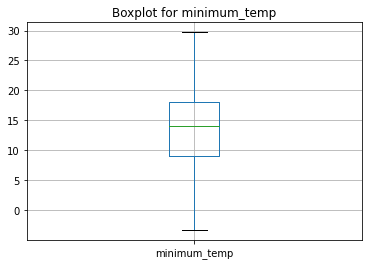

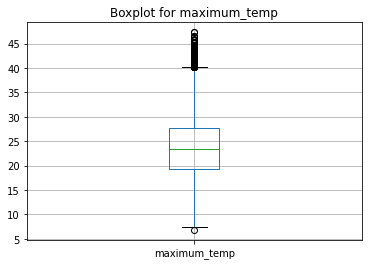

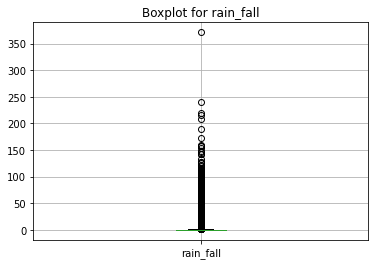

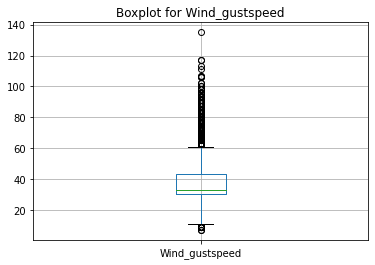

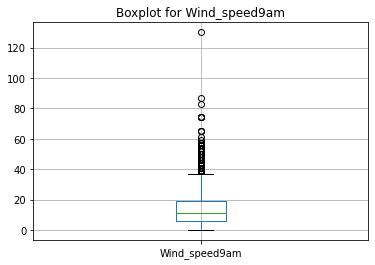

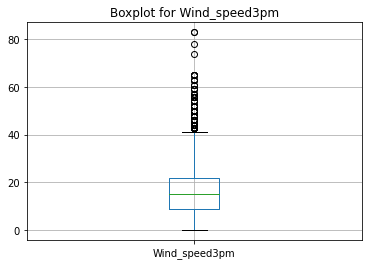

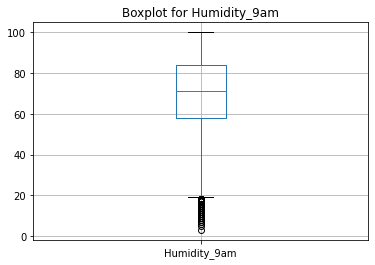

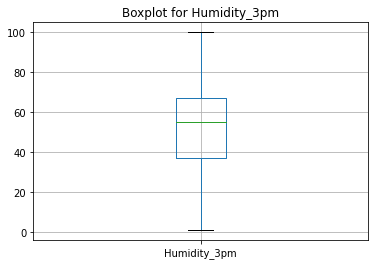

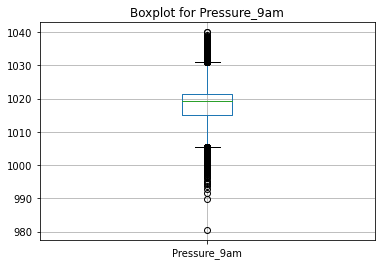

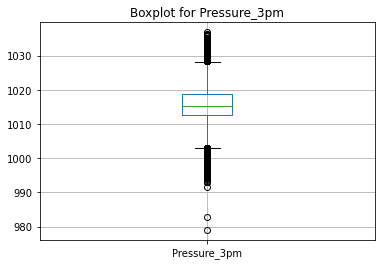

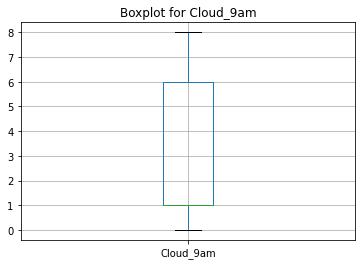

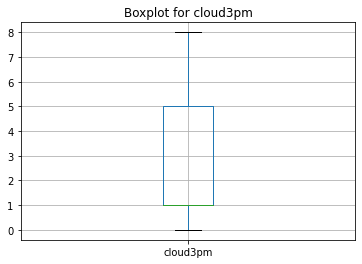

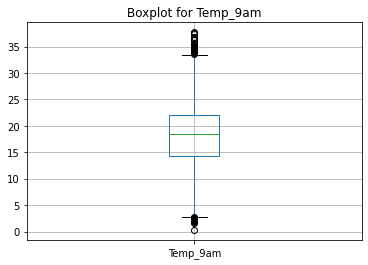

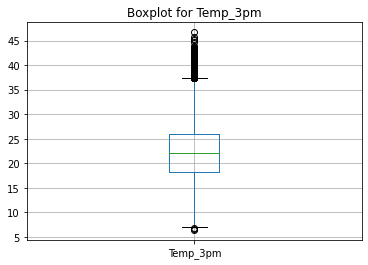

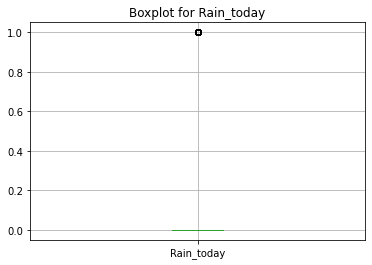

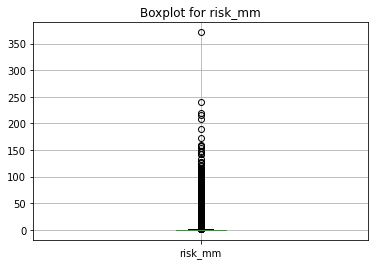

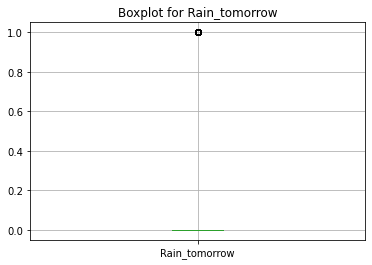

In [46]:
for column in df.columns:
    if df[column].dtype in ['float64', 'int64']:
        plt.figure()
        df.boxplot(column=[column])
        plt.title('Boxplot for ' + column)

# Show the plot
plt.show()

In [47]:
# Define a function to replace outliers with the mean of the column
def replace_outliers(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    column_mean = column.mean()
    column[column < lower_bound] = column_mean
    column[column > upper_bound] = column_mean
    return column

# Replace outliers with the mean of each column in the dataset
for column in df.columns:
    if df[column].dtype in ['float64', 'int64']:
        df[column] = replace_outliers(df[column])

# Show the modified dataset
df.head()

,date,location,minimum_temp,maximum_temp,rain_fall,Wind_gustspeed,Winddir_9am,Winddir_3pm,Wind_speed9am,Wind_speed3pm,Humidity_9am,Humidity_3pm,Pressure_9am,Pressure_3pm,Cloud_9am,cloud3pm,Temp_9am,Temp_3pm,Rain_today,risk_mm,Rain_tomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,1.0,16.9,21.8,0.0,0.0,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,1.0,1.0,17.2,24.3,0.0,0.0,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,1.0,2.0,21.0,23.2,0.0,0.0,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,1.0,1.0,18.1,26.5,0.0,1.0,0.0
4,2008-12-05,Albury,17.5,32.3,1.0,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.2,0.0


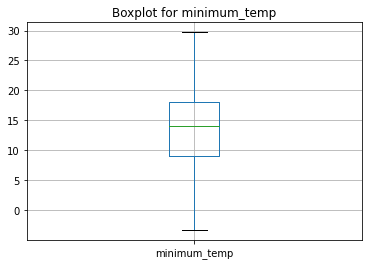

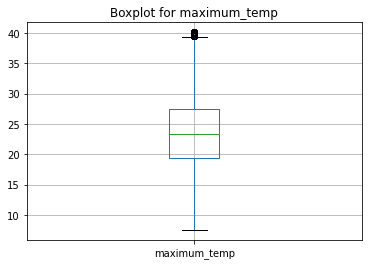

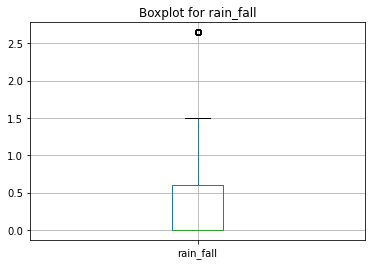

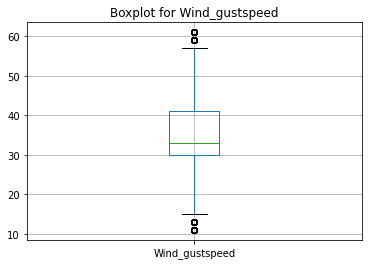

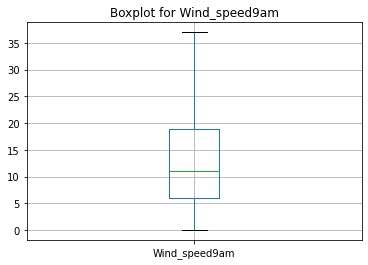

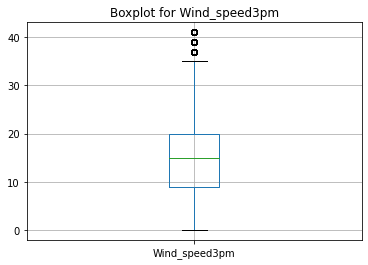

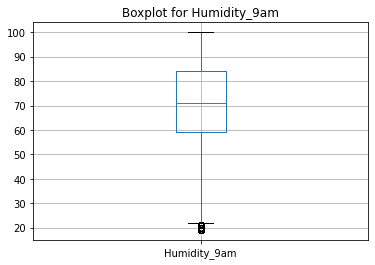

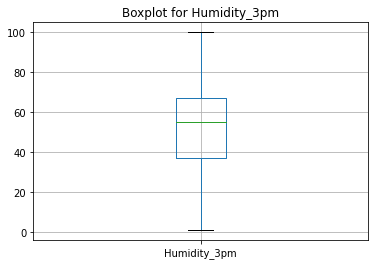

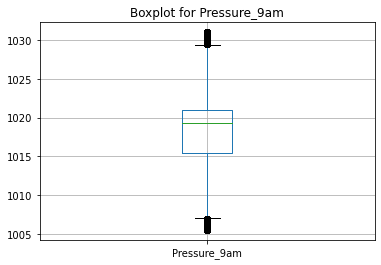

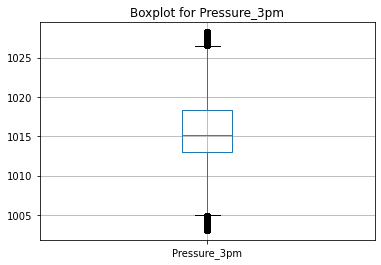

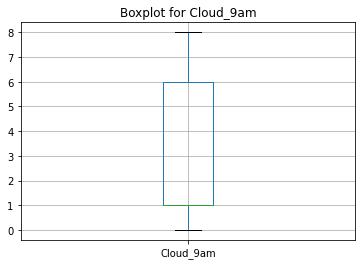

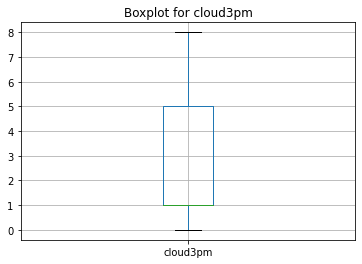

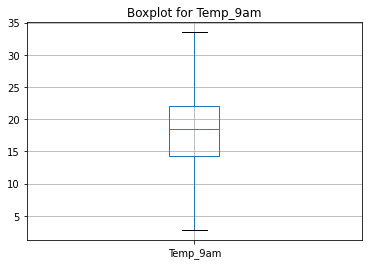

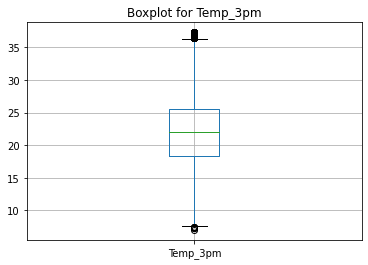

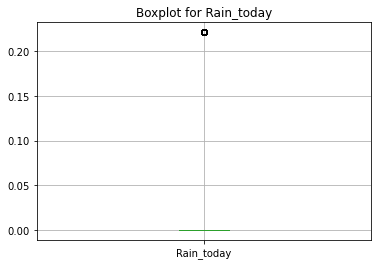

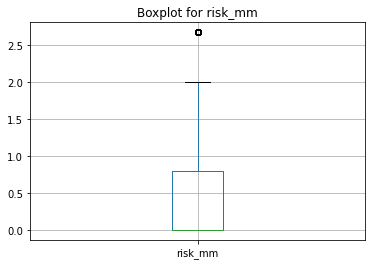

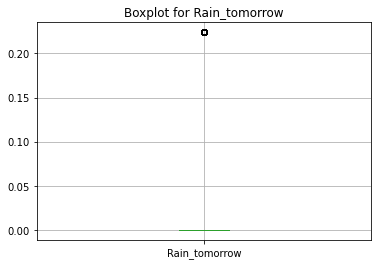

In [48]:
for column in df.columns:
    if df[column].dtype in ['float64', 'int64']:
        plt.figure()
        df.boxplot(column=[column])
        plt.title('Boxplot for ' + column)

# Show the plot
plt.show()

In [49]:
df.describe()

,minimum_temp,maximum_temp,rain_fall,Wind_gustspeed,Wind_speed9am,Wind_speed3pm,Humidity_9am,Humidity_3pm,Pressure_9am,Pressure_3pm,Cloud_9am,cloud3pm,Temp_9am,Temp_3pm,Rain_today,risk_mm,Rain_tomorrow
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,13.356868,23.770816,0.614009,35.441458,12.098610,16.109633,70.576115,53.113400,1018.416818,1015.553359,2.838560,2.883960,17.988582,22.228946,0.048823,0.607719,0.050086
std,5.834302,5.820353,1.048109,10.055132,8.623588,8.377869,17.561815,20.820351,4.965480,4.889520,2.753442,2.638115,5.320498,5.438957,0.091677,1.033862,0.093279
min,-3.300000,7.500000,0.000000,11.000000,0.000000,0.000000,19.000000,1.000000,1005.500000,1003.100000,0.000000,0.000000,2.800000,7.000000,0.000000,0.000000,0.000000
25%,9.000000,19.400000,0.000000,30.000000,6.000000,9.000000,59.000000,37.000000,1015.400000,1013.000000,1.000000,1.000000,14.300000,18.300000,0.000000,0.000000,0.000000
50%,14.100000,23.300000,0.000000,33.000000,11.000000,15.000000,71.000000,55.000000,1019.300000,1015.200000,1.000000,1.000000,18.500000,22.000000,0.000000,0.000000,0.000000
75%,18.000000,27.400000,0.600000,41.000000,19.000000,20.000000,84.000000,67.000000,1021.000000,1018.400000,6.000000,5.000000,22.000000,25.500000,0.000000,0.800000,0.000000
max,29.700000,40.100000,2.644620,61.000000,37.000000,41.000000,100.000000,100.000000,1031.000000,1028.200000,8.000000,8.000000,33.500000,37.300000,0.220960,2.677376,0.223800


### Vizualization

#### 1-What is min and max temp value?
#### 2-The Relation Between Min and max Temp and rain_today and rain_tomorrow?
#### 3-If their a cloud Thats mean its Rain?
#### 4-The Max wind speed relation with Temp and cloud?
#### 5-Its rain in 3pm more than 9am or else?
#### 6-The change of wind speed and rain today?
#### 7-How does average temperature vary throughout the year in different regions of the world?
#### 8-What is the distribution of daily maximum and minimum temperatures over a week in a particular location?
#### 9-How does rainfall vary over the course of a year in different parts of the world?
#### 10-What is the correlation between humidity and temperature in a particular location over time?
#### 11-How does wind speed vary over the course of a year in different parts of the world?
#### 12-What is the relationship between temperature and precipitation in a particular location over time?
#### 13-How does temperature vary with altitude in a particular region?
#### 14-What is the frequency of extreme weather events (e.g. hurricanes, tornadoes, etc.) in different parts of the world?
#### 15-How does the amount of snowfall vary over the course of a year in different parts of the world?
#### 16-How does the amount of precipitation vary with altitude in a particular region?
#### 17-How does the timing of the rainy season vary in different parts of the world?
#### 18-What is the distribution of daily temperature range over a week in a particular location?
#### 19-How does the frequency of thunderstorms vary over the course of a year in different regions of the world?
#### 20-What is the relationship between humidity and rainfall in a particular location over time?

# ------------------------------------------------------------------------------------------------------------

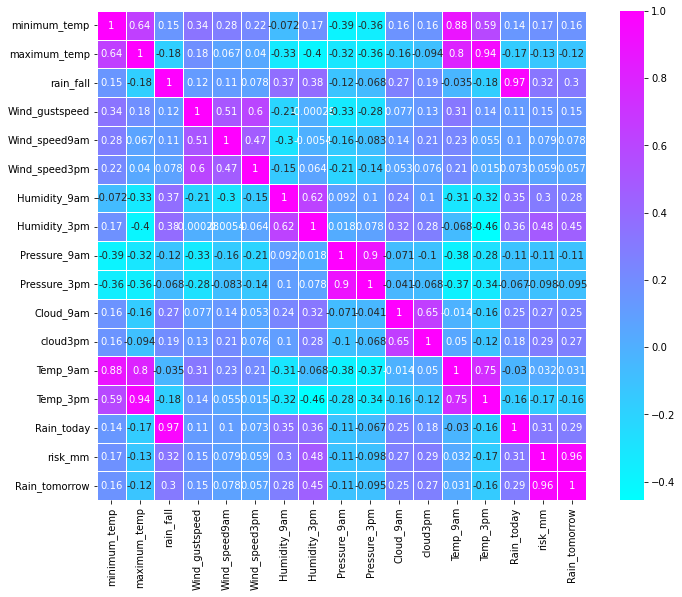

In [50]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_df = df[numeric_columns]

corrmat = numeric_df.corr()

# Rest of your code for heatmap
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, cmap="cool", square=True, linewidths=.5, annot=True)
plt.show()

#### 1-What is min and max temp value?

In [51]:
column = df['minimum_temp']
min_value = column.min()
min_value

-3.3

In [52]:
column = df['maximum_temp']
max_value = column.max()
max_value

40.1

#### 2-The Relation Between Min and max Temp and rain_today and rain_tomorrow?

In [53]:
col=['minimum_temp','maximum_temp','Rain_today','Rain_tomorrow']

In [54]:
data=df[col]
data

,minimum_temp,maximum_temp,Rain_today,Rain_tomorrow
0,13.4,22.9,0.0,0.0
1,7.4,25.1,0.0,0.0
2,12.9,25.7,0.0,0.0
3,9.2,28.0,0.0,0.0
4,17.5,32.3,0.0,0.0
...,...,...,...,...
24995,16.5,30.0,0.0,0.0
24996,16.7,30.5,0.0,0.0
24997,18.3,29.8,0.0,0.0
24998,17.5,28.1,0.0,0.0


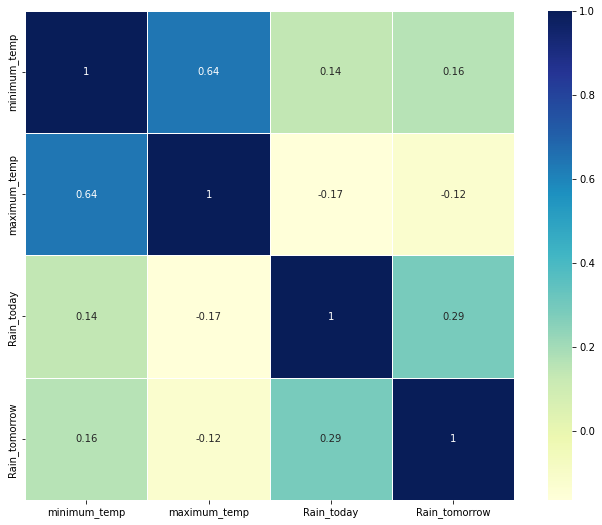

In [55]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, cmap="YlGnBu", square=True,linewidths=.5, annot=True)
plt.show()

# There is no relation between temperature and Rain.•

#### 3-If their a cloud Thats mean its Rain?

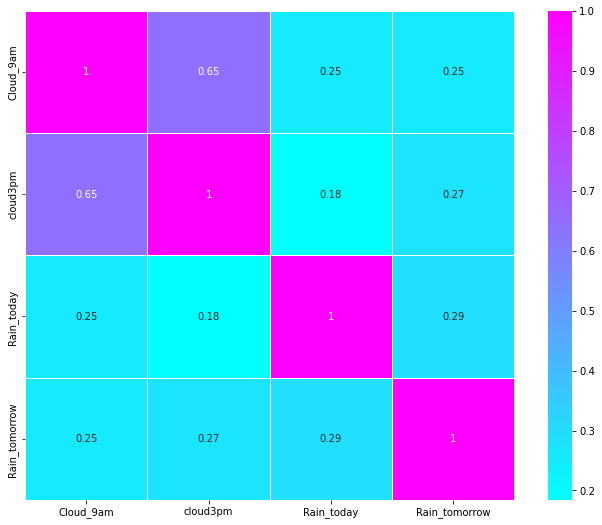

In [56]:
col=['Cloud_9am','cloud3pm','Rain_today','Rain_tomorrow']

data=df[col]
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, cmap="cool", square=True,linewidths=.5, annot=True)
plt.show()

# There is relation between cloud and Rain but it's weak.‏

#### 4-The wind speed relation with Temp and cloud?

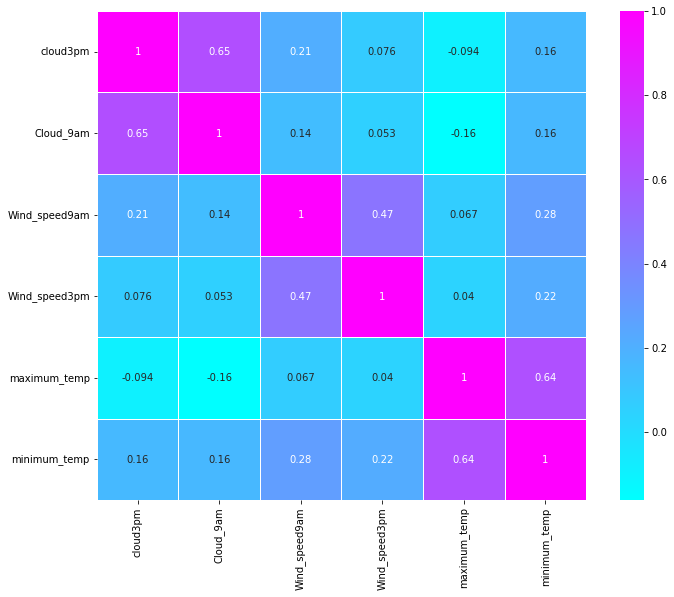

In [57]:
col=['cloud3pm','Cloud_9am','Wind_speed9am','Wind_speed3pm','maximum_temp','minimum_temp']
data=df[col]
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, cmap="cool", square=True,linewidths=.5, annot=True)
plt.show()

# There is relation between cloud and maximum_temp is not very strong.‏

#### 5-The change of wind speed and rain today?

<AxesSubplot:xlabel='Wind_speed9am', ylabel='Wind_speed3pm'>

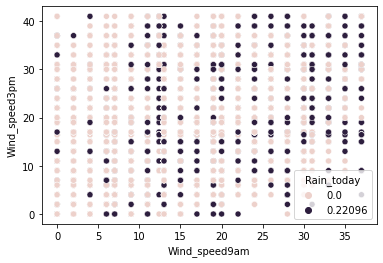

In [58]:
sns.scatterplot(x=df['Wind_speed9am'], y=df['Wind_speed3pm'], hue=df['Rain_today'])

#### 6-How does average temperature vary throughout the year?

In [59]:
df.groupby('date')[['Temp_9am', 'Temp_3pm']].mean()


,Temp_9am,Temp_3pm
date,,
2008-12-01,21.033333,27.900000
2008-12-02,19.866667,26.600000
2008-12-03,21.400000,28.866667
2008-12-04,19.333333,24.066667
2008-12-05,19.200000,27.100000
...,...,...
2017-06-21,11.975000,18.687500
2017-06-22,12.725000,18.712500
2017-06-23,13.274093,17.800000


<AxesSubplot:xlabel='date'>

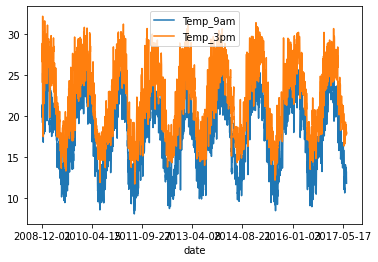

In [60]:
df.groupby('date')[['Temp_9am', 'Temp_3pm']].mean().plot()


#### 7-What is the distribution of daily maximum and minimum temperatures over a week in a particular location?

In [61]:
df['Temp_3pm'].describe()


count    25000.000000
mean        22.228946
std          5.438957
min          7.000000
25%         18.300000
50%         22.000000
75%         25.500000
max         37.300000
Name: Temp_3pm, dtype: float64

In [62]:
df.groupby('date')[['Temp_9am', 'Temp_3pm']].max()

,Temp_9am,Temp_3pm
date,,
2008-12-01,24.4,31.3
2008-12-02,22.0,30.1
2008-12-03,22.2,32.0
2008-12-04,20.4,26.5
2008-12-05,20.0,29.7
...,...,...
2017-06-21,19.6,22.0
2017-06-22,19.7,22.0
2017-06-23,18.3,22.0


<AxesSubplot:xlabel='date'>

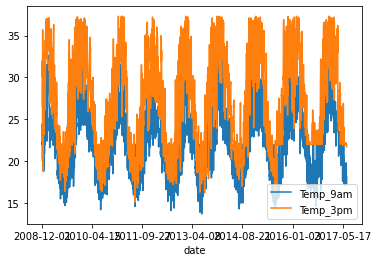

In [63]:
df.groupby('date')[['Temp_9am', 'Temp_3pm']].max().plot()

In [64]:
df['Temp_9am'].describe()


count    25000.000000
mean        17.988582
std          5.320498
min          2.800000
25%         14.300000
50%         18.500000
75%         22.000000
max         33.500000
Name: Temp_9am, dtype: float64

In [65]:
df.groupby('date')[['Temp_9am', 'Temp_3pm']].min()

,Temp_9am,Temp_3pm
date,,
2008-12-01,16.9,21.8
2008-12-02,17.2,24.3
2008-12-03,21.0,23.2
2008-12-04,18.1,22.7
2008-12-05,17.8,22.0
...,...,...
2017-06-21,2.9,14.3
2017-06-22,3.6,13.3
2017-06-23,6.8,10.2


<AxesSubplot:xlabel='date'>

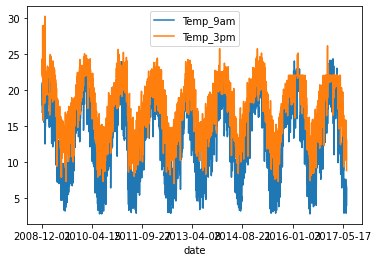

In [66]:
df.groupby('date')[['Temp_9am', 'Temp_3pm']].min().plot()

#### 8-How does rainfall vary over the course of a year in different parts of the world?

In [67]:
df.groupby('location')['rain_fall'].mean()

location
Albury           0.564024
BadgerysCreek    0.547314
Cobar            0.354501
CoffsHarbour     0.798983
Moree            0.370430
Newcastle        0.681687
NorahHead        0.746981
NorfolkIsland    0.864915
Penrith          0.569582
Name: rain_fall, dtype: float64

<AxesSubplot:xlabel='location'>

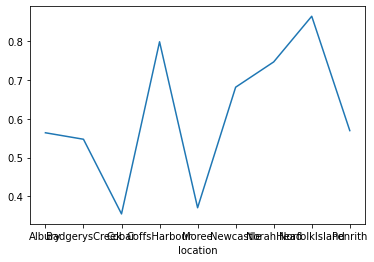

In [68]:
df.groupby('location')['rain_fall'].mean().plot()

#### 9-What is the correlation between humidity and temperature over time?

In [69]:
df.groupby('date')[['Temp_9am', 'Temp_3pm']].corr()

Temp_9am  Temp_3pm
date                                   
2008-12-01 Temp_9am  1.000000  0.960444
           Temp_3pm  0.960444  1.000000
2008-12-02 Temp_9am  1.000000  0.361266
           Temp_3pm  0.361266  1.000000
2008-12-03 Temp_9am  1.000000  0.551911
...                       ...       ...
2017-06-23 Temp_3pm -0.343013  1.000000
2017-06-24 Temp_9am  1.000000  0.425077
           Temp_3pm  0.425077  1.000000
2017-06-25 Temp_9am  1.000000  0.598603
           Temp_3pm  0.598603  1.000000

[6080 rows x 2 columns]

#### 10-How does wind speed vary over the course of a year in different parts of the world?

<AxesSubplot:xlabel='location'>

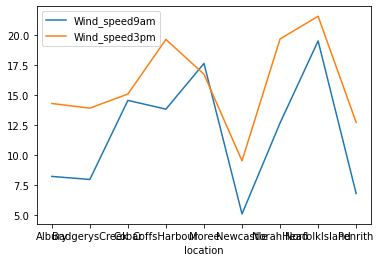

In [70]:
df.groupby('location')[['Wind_speed9am', 'Wind_speed3pm']].mean().plot()

<AxesSubplot:xlabel='location'>

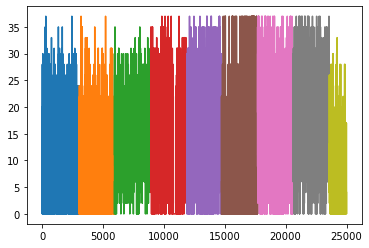

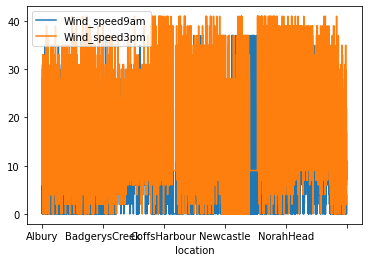

In [71]:
df.groupby('location')['Wind_speed9am'].plot()


df.plot(x='location', y=['Wind_speed9am', 'Wind_speed3pm'])


#### 11-What is the relationship between temperature and rain fail in a particular location over time?

In [72]:
df.groupby('location')[['Temp_9am', 'rain_fall']].corr()

Temp_9am  rain_fall
location                                    
Albury        Temp_9am   1.000000  -0.116075
              rain_fall -0.116075   1.000000
BadgerysCreek Temp_9am   1.000000   0.048475
              rain_fall  0.048475   1.000000
Cobar         Temp_9am   1.000000  -0.087194
              rain_fall -0.087194   1.000000
CoffsHarbour  Temp_9am   1.000000  -0.077217
              rain_fall -0.077217   1.000000
Moree         Temp_9am   1.000000  -0.022116
              rain_fall -0.022116   1.000000
Newcastle     Temp_9am   1.000000  -0.072183
              rain_fall -0.072183   1.000000
NorahHead     Temp_9am   1.000000  -0.137614
              rain_fall -0.137614   1.000000
NorfolkIsland Temp_9am   1.000000  -0.124807
              rain_fall -0.124807   1.000000
Penrith       Temp_9am   1.000000   0.066642
              rain_fall  0.066642   1.000000

#### 12-How does temperature vary with altitude in a particular region?

location
Albury           AxesSubplot(0.125,0.125;0.775x0.755)
BadgerysCreek    AxesSubplot(0.125,0.125;0.775x0.755)
Cobar            AxesSubplot(0.125,0.125;0.775x0.755)
CoffsHarbour     AxesSubplot(0.125,0.125;0.775x0.755)
Moree            AxesSubplot(0.125,0.125;0.775x0.755)
Newcastle        AxesSubplot(0.125,0.125;0.775x0.755)
NorahHead        AxesSubplot(0.125,0.125;0.775x0.755)
NorfolkIsland    AxesSubplot(0.125,0.125;0.775x0.755)
Penrith          AxesSubplot(0.125,0.125;0.775x0.755)
Name: Temp_9am, dtype: object

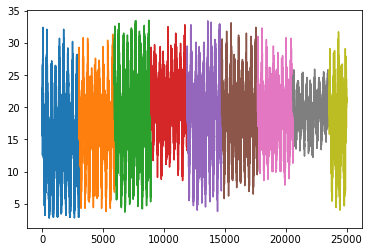

In [73]:
df.groupby('location')['Temp_9am'].plot()

#### 13-What is the frequency of extreme weather events (e.g. hurricanes, tornadoes, etc.) in different parts of the world?

In [74]:
df.groupby('location').agg(['count'])

,date,minimum_temp,maximum_temp,rain_fall,Wind_gustspeed,Winddir_9am,Winddir_3pm,Wind_speed9am,Wind_speed3pm,Humidity_9am,Humidity_3pm,Pressure_9am,Pressure_3pm,Cloud_9am,cloud3pm,Temp_9am,Temp_3pm,Rain_today,risk_mm,Rain_tomorrow
,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count
location,,,,,,,,,,,,,,,,,,,,
Albury,3011,3011,3011,3011,3011,3011,3011,3011,3011,3011,3011,3011,3011,3011,3011,3011,3011,3011,3011,3011
BadgerysCreek,2928,2928,2928,2928,2928,2928,2928,2928,2928,2928,2928,2928,2928,2928,2928,2928,2928,2928,2928,2928
Cobar,2988,2988,2988,2988,2988,2988,2988,2988,2988,2988,2988,2988,2988,2988,2988,2988,2988,2988,2988,2988
CoffsHarbour,2953,2953,2953,2953,2953,2953,2953,2953,2953,2953,2953,2953,2953,2953,2953,2953,2953,2953,2953,2953
Moree,2854,2854,2854,2854,2854,2854,2854,2854,2854,2854,2854,2854,2854,2854,2854,2854,2854,2854,2854,2854
Newcastle,2955,2955,2955,2955,2955,2955,2955,2955,2955,2955,2955,2955,2955,2955,2955,2955,2955,2955,2955,2955
NorahHead,2929,2929,2929,2929,2929,2929,2929,2929,2929,2929,2929,2929,2929,2929,2929,2929,2929,2929,2929,2929
NorfolkIsland,2964,2964,2964,2964,2964,2964,2964,2964,2964,2964,2964,2964,2964,2964,2964,2964,2964,2964,2964,2964


#### 14-How does the amount of precipitation vary with altitude in a particular region?


location
Albury           AxesSubplot(0.125,0.125;0.775x0.755)
BadgerysCreek    AxesSubplot(0.125,0.125;0.775x0.755)
Cobar            AxesSubplot(0.125,0.125;0.775x0.755)
CoffsHarbour     AxesSubplot(0.125,0.125;0.775x0.755)
Moree            AxesSubplot(0.125,0.125;0.775x0.755)
Newcastle        AxesSubplot(0.125,0.125;0.775x0.755)
NorahHead        AxesSubplot(0.125,0.125;0.775x0.755)
NorfolkIsland    AxesSubplot(0.125,0.125;0.775x0.755)
Penrith          AxesSubplot(0.125,0.125;0.775x0.755)
Name: rain_fall, dtype: object

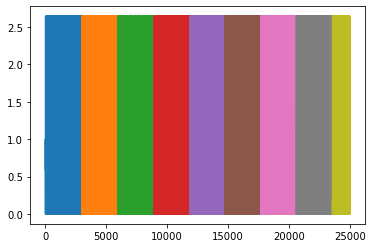

In [75]:
df.groupby('location')['rain_fall'].plot()

#### 15-How does the timing of the rainy season vary in different parts of the world?

In [76]:
df.groupby('location')['rain_fall'].mean()

location
Albury           0.564024
BadgerysCreek    0.547314
Cobar            0.354501
CoffsHarbour     0.798983
Moree            0.370430
Newcastle        0.681687
NorahHead        0.746981
NorfolkIsland    0.864915
Penrith          0.569582
Name: rain_fall, dtype: float64

#### 16-What is the distribution of daily temperature range over a week in a particular location?

In [77]:
df.groupby(["location", "date"])["Temp_9am"].count()

location  date      
Albury    2008-12-01    1
          2008-12-02    1
          2008-12-03    1
          2008-12-04    1
          2008-12-05    1
                       ..
Penrith   2013-03-09    1
          2013-03-10    1
          2013-03-11    1
          2013-03-12    1
          2013-03-13    1
Name: Temp_9am, Length: 25000, dtype: int64

In [78]:
df.groupby(["location", "date"])["Temp_3pm"].count()

location  date      
Albury    2008-12-01    1
          2008-12-02    1
          2008-12-03    1
          2008-12-04    1
          2008-12-05    1
                       ..
Penrith   2013-03-09    1
          2013-03-10    1
          2013-03-11    1
          2013-03-12    1
          2013-03-13    1
Name: Temp_3pm, Length: 25000, dtype: int64

#### 17-What is the minimum temperature in each location?

In [79]:
df.groupby('location')['minimum_temp'].min()

location
Albury          -2.8
BadgerysCreek   -3.0
Cobar           -2.0
CoffsHarbour     0.6
Moree           -3.3
Newcastle        2.2
NorahHead        4.6
NorfolkIsland    9.4
Penrith         -1.1
Name: minimum_temp, dtype: float64

#### 18-What is the maximum temperature in each location?

In [80]:
df.groupby('location')['maximum_temp'].max()

location
Albury           40.1
BadgerysCreek    40.1
Cobar            40.1
CoffsHarbour     39.2
Moree            40.1
Newcastle        40.0
NorahHead        39.9
NorfolkIsland    28.4
Penrith          40.0
Name: maximum_temp, dtype: float64

#### 19-What is the avrg rain fell in each location?

In [81]:
df.groupby('location')['rain_fall'].mean().round(3)

location
Albury           0.564
BadgerysCreek    0.547
Cobar            0.355
CoffsHarbour     0.799
Moree            0.370
Newcastle        0.682
NorahHead        0.747
NorfolkIsland    0.865
Penrith          0.570
Name: rain_fall, dtype: float64

#### 20-What was the wind gust speed in each location?

In [82]:
df.groupby('location')['Wind_gustspeed'].mean().round(3)

location
Albury           31.906
BadgerysCreek    32.506
Cobar            35.879
CoffsHarbour     37.194
Moree            38.218
Newcastle        31.000
NorahHead        38.649
NorfolkIsland    40.080
Penrith          31.783
Name: Wind_gustspeed, dtype: float64

#### 21-What was the wind direction at 9am in each location?

In [83]:
df['Winddir_9am']

0          W
1        NNW
2          W
3         SE
4        ENE
        ... 
24995    SSE
24996    ESE
24997     SW
24998      S
24999     NE
Name: Winddir_9am, Length: 25000, dtype: object

#### 22-What was the wind direction at 3pm in each location?

In [84]:
df['Winddir_3pm']

0        WNW
1        WSW
2        WSW
3          E
4         NW
        ... 
24995     NE
24996      N
24997    ESE
24998     NE
24999     NE
Name: Winddir_3pm, Length: 25000, dtype: object

#### 23-What was the wind speed at 9am in each location?

In [85]:
df.groupby('location')['Wind_speed9am'].mean().round(3)

location
Albury            8.211
BadgerysCreek     7.955
Cobar            14.568
CoffsHarbour     13.836
Moree            17.658
Newcastle         5.075
NorahHead        12.683
NorfolkIsland    19.538
Penrith           6.779
Name: Wind_speed9am, dtype: float64

#### 24-What was the wind speed at 3pm in each location?

In [86]:
df.groupby('location')['Wind_speed3pm'].mean().round(3)

location
Albury           14.307
BadgerysCreek    13.919
Cobar            15.097
CoffsHarbour     19.664
Moree            16.753
Newcastle         9.518
NorahHead        19.703
NorfolkIsland    21.603
Penrith          12.728
Name: Wind_speed3pm, dtype: float64

#### 25-What was the humidity at 9am in each location?


In [87]:
df.groupby('location')['Humidity_9am'].mean().round(3)

location
Albury           74.160
BadgerysCreek    77.122
Cobar            58.924
CoffsHarbour     67.943
Moree            61.483
Newcastle        75.654
NorahHead        74.758
NorfolkIsland    70.859
Penrith          77.973
Name: Humidity_9am, dtype: float64

#### 26-What was the humidity at 3pm in each location?

In [88]:
df.groupby('location')['Humidity_3pm'].mean().round(3)

location
Albury           47.902
BadgerysCreek    51.528
Cobar            34.908
CoffsHarbour     62.232
Moree            35.629
Newcastle        58.415
NorahHead        67.508
NorfolkIsland    67.836
Penrith          50.459
Name: Humidity_3pm, dtype: float64

#### 27-What was the pressure at 9am in each location?

In [89]:
df.groupby('location')['Pressure_9am'].mean().round(3)

location
Albury           1018.202
BadgerysCreek    1018.493
Cobar            1017.988
CoffsHarbour     1018.331
Moree            1018.303
Newcastle        1019.300
NorahHead        1018.321
NorfolkIsland    1017.979
Penrith          1019.300
Name: Pressure_9am, dtype: float64

#### 28-What was the pressure at 3pm in each location?


In [90]:
df.groupby('location')['Pressure_3pm'].mean().round(3)

location
Albury           1015.557
BadgerysCreek    1015.618
Cobar            1015.301
CoffsHarbour     1015.721
Moree            1015.067
Newcastle        1015.200
NorahHead        1016.002
NorfolkIsland    1016.118
Penrith          1015.200
Name: Pressure_3pm, dtype: float64

#### 29-What was the cloud cover at 9am in each location?

In [91]:
df.groupby('location')['Cloud_9am'].mean().round(3)

location
Albury           3.296
BadgerysCreek    1.000
Cobar            3.015
CoffsHarbour     3.460
Moree            2.925
Newcastle        3.934
NorahHead        1.000
NorfolkIsland    4.914
Penrith          1.000
Name: Cloud_9am, dtype: float64

#### 30-What was the cloud cover at 3pm in each location?

In [92]:
df.groupby('location')['cloud3pm'].mean().round(3)

location
Albury           3.077
BadgerysCreek    1.000
Cobar            3.564
CoffsHarbour     3.628
Moree            3.570
Newcastle        3.343
NorahHead        1.000
NorfolkIsland    4.767
Penrith          1.000
Name: cloud3pm, dtype: float64

#### 31-What was the temperature at 9am in each location?

In [93]:
df.groupby('location')['Temp_9am'].mean().round(3)

location
Albury           14.473
BadgerysCreek    16.603
Cobar            17.956
CoffsHarbour     20.117
Moree            18.799
Newcastle        18.322
NorahHead        18.503
NorfolkIsland    19.749
Penrith          16.882
Name: Temp_9am, dtype: float64

#### 32-What was the temperature at 3pm in each location?

In [94]:
df.groupby('location')['Temp_3pm'].mean().round(3)

location
Albury           21.051
BadgerysCreek    22.242
Cobar            23.714
CoffsHarbour     22.291
Moree            25.113
Newcastle        22.126
NorahHead        20.747
NorfolkIsland    20.437
Penrith          22.661
Name: Temp_3pm, dtype: float64

#### 33-Was there rain today in each location?

In [95]:
df.groupby('location')['Rain_today'].mean().round(3)

location
Albury           0.045
BadgerysCreek    0.043
Cobar            0.028
CoffsHarbour     0.065
Moree            0.030
Newcastle        0.054
NorahHead        0.060
NorfolkIsland    0.068
Penrith          0.043
Name: Rain_today, dtype: float64

#### 34-What was the risk of rain in each location?

In [96]:
df.groupby('location')['risk_mm'].mean().round(3)

location
Albury           0.554
BadgerysCreek    0.542
Cobar            0.348
CoffsHarbour     0.788
Moree            0.378
Newcastle        0.678
NorahHead        0.745
NorfolkIsland    0.844
Penrith          0.572
Name: risk_mm, dtype: float64

In [97]:
df.to_csv('Cleand_weather_data.csv',index=False)

# Classification models

In [98]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.compose import ColumnTransformer
# for Classifcation
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, \
    precision_recall_fscore_support,precision_score,recall_score,classification_report
# for Regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,\
explained_variance_score, max_error, median_absolute_error
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import lazypredict
from lazypredict.Supervised import LazyClassifier
from lazypredict.Supervised import LazyRegressor
#from pycaret.regression import *
from pycaret.classification import *
#from pycaret.clustering import *
from skimpy import skim
from summarytools import dfSummary
import sweetviz as sv
import statsmodels.api as sm
import missingno as msno
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="dask")


In [99]:
df2=pd.read_csv(r"E:\Machine Project\Cleand_weather_data.csv")

In [100]:
df2.head()

,date,location,minimum_temp,maximum_temp,rain_fall,Wind_gustspeed,Winddir_9am,Winddir_3pm,Wind_speed9am,Wind_speed3pm,Humidity_9am,Humidity_3pm,Pressure_9am,Pressure_3pm,Cloud_9am,cloud3pm,Temp_9am,Temp_3pm,Rain_today,risk_mm,Rain_tomorrow
0,2008-12-01,Albury,13.40,22.90,0.60,44.00,W,WNW,20.00,24.00,71.00,22.00,1007.70,1007.10,8.00,1.00,16.90,21.80,0.00,0.00,0.00
1,2008-12-02,Albury,7.40,25.10,0.00,44.00,NNW,WSW,4.00,22.00,44.00,25.00,1010.60,1007.80,1.00,1.00,17.20,24.30,0.00,0.00,0.00
2,2008-12-03,Albury,12.90,25.70,0.00,46.00,W,WSW,19.00,26.00,38.00,30.00,1007.60,1008.70,1.00,2.00,21.00,23.20,0.00,0.00,0.00
3,2008-12-04,Albury,9.20,28.00,0.00,24.00,SE,E,11.00,9.00,45.00,16.00,1017.60,1012.80,1.00,1.00,18.10,26.50,0.00,1.00,0.00
4,2008-12-05,Albury,17.50,32.30,1.00,41.00,ENE,NW,7.00,20.00,82.00,33.00,1010.80,1006.00,7.00,8.00,17.80,29.70,0.00,0.20,0.00


In [101]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your cleaned weather DataFrame
categorical_columns = df2.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()

for column in categorical_columns:
    df2[column] = label_encoder.fit_transform(df2[column])

In [102]:
df2

,date,location,minimum_temp,maximum_temp,rain_fall,Wind_gustspeed,Winddir_9am,Winddir_3pm,Wind_speed9am,Wind_speed3pm,Humidity_9am,Humidity_3pm,Pressure_9am,Pressure_3pm,Cloud_9am,cloud3pm,Temp_9am,Temp_3pm,Rain_today,risk_mm,Rain_tomorrow
0,0,0,13.40,22.90,0.60,44.00,13,14,20.00,24.00,71.00,22.00,1007.70,1007.10,8.00,1.00,16.90,21.80,0.00,0.00,0.00
1,1,0,7.40,25.10,0.00,44.00,6,15,4.00,22.00,44.00,25.00,1010.60,1007.80,1.00,1.00,17.20,24.30,0.00,0.00,0.00
2,2,0,12.90,25.70,0.00,46.00,13,15,19.00,26.00,38.00,30.00,1007.60,1008.70,1.00,2.00,21.00,23.20,0.00,0.00,0.00
3,3,0,9.20,28.00,0.00,24.00,9,0,11.00,9.00,45.00,16.00,1017.60,1012.80,1.00,1.00,18.10,26.50,0.00,1.00,0.00
4,4,0,17.50,32.30,1.00,41.00,1,7,7.00,20.00,82.00,33.00,1010.80,1006.00,7.00,8.00,17.80,29.70,0.00,0.20,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,1470,8,16.50,30.00,0.00,26.00,10,4,2.00,7.00,87.00,41.00,1019.30,1015.20,1.00,1.00,21.60,29.40,0.00,0.00,0.00
24996,1471,8,16.70,30.50,0.00,24.00,2,3,4.00,6.00,84.00,44.00,1019.30,1015.20,1.00,1.00,21.30,29.00,0.00,0.00,0.00
24997,1472,8,18.30,29.80,0.00,26.00,12,2,0.00,6.00,98.00,49.00,1019.30,1015.20,1.00,1.00,20.60,28.20,0.00,0.00,0.00
24998,1473,8,17.50,28.10,0.00,22.00,8,4,4.00,7.00,90.00,54.00,1019.30,1015.20,1.00,1.00,21.20,26.80,0.00,0.00,0.00


In [103]:
X = df2.drop('Rain_tomorrow', axis = 1)
y = df2['Rain_tomorrow']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [104]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [105]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [106]:
X = df2.drop('Rain_tomorrow', axis=1)
y = df2['Rain_tomorrow']

# Convert the continuous target variable into binary classes
label_encoder = LabelEncoder()
y_binary = label_encoder.fit_transform(pd.cut(y, bins=2, labels=False))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [107]:
y_pred = log_reg.predict(X_test)
print(accuracy_score(y_train, log_reg.predict(X_train)))

log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))
print(log_reg_acc)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.94525
0.946
[[3756  133]
 [ 137  974]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      3889
           1       0.88      0.88      0.88      1111

    accuracy                           0.95      5000
   macro avg       0.92      0.92      0.92      5000
weighted avg       0.95      0.95      0.95      5000



In [108]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [109]:
y_pred = knn.predict(X_test)
print(accuracy_score(y_train, knn.predict(X_train)))

knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(knn_acc)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.87335
0.8224
[[3657  232]
 [ 656  455]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      3889
           1       0.66      0.41      0.51      1111

    accuracy                           0.82      5000
   macro avg       0.76      0.67      0.70      5000
weighted avg       0.81      0.82      0.81      5000



In [110]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


In [ ]:
svc = SVC()
parameters = {
    'gamma' : [0.0001, 0.001, 0.01, 0.1],
    'C' : [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20]
}

grid_search = GridSearchCV(svc, parameters)
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_score_


In [ ]:
svc = SVC(C = 10, gamma = 0.01)
svc.fit(X_train, y_train)

In [ ]:
y_pred = svc.predict(X_test)
print(accuracy_score(y_train, svc.predict(X_train)))
svc_acc = accuracy_score(y_test, svc.predict(X_test))
print(svc_acc)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))